# Python is awesome

In [1]:
import pandas
url = 'http://manage.hdx.rwlabs.org/hdx/api/exporter/indicator/csv/PSE030/source/world-bank/fromYear/1950/toYear/0/language/en/PSE030_Baseline.csv'
data = pandas.io.parsers.read_csv(url)


In [2]:
print(data)


    Country code                      Country name          2013  \
0            ABW                             ARUBA           NaN   
1            AFG                       AFGHANISTAN   1946.193806   
2            AGO                            ANGOLA   7736.174682   
3            ALB                           ALBANIA   9930.943226   
4            ARE              UNITED ARAB EMIRATES           NaN   
5            ARG                         ARGENTINA           NaN   
6            ARM                           ARMENIA   7776.286043   
7            ATG               ANTIGUA AND BARBUDA  21027.826640   
8            AUS                         AUSTRALIA  43202.367688   
9            AUT                           AUSTRIA  45079.092211   
10           AZE                        AZERBAIJAN  17143.109665   
11           BDI                           BURUNDI    771.715430   
12           BEL                           BELGIUM  41574.756309   
13           BEN                             BEN

In [3]:
data.columns 


Index(['Country code', 'Country name', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982',
       '1981', '1980'],
      dtype='object')

In [6]:
richCountries = data[ data['2013'] > 50000 ]
print(richCountries)


    Country code       Country name           2013           2012  \
26           BRN  BRUNEI DARUSSALAM   71776.648012   72953.867981   
31           CHE        SWITZERLAND   56950.024339   55915.499995   
73           HKG          HONG KONG   53215.937373   51176.192575   
105          LUX          LUXEMBURG   91047.588883   91849.920215   
107          MAC              MACAU  142599.240319  127742.698900   
129          NOR             NORWAY   64405.712221   65103.698037   
144          QAT              QATAR  136727.253610  134289.773572   
148          SAU       SAUDI ARABIA   53644.126925   52042.469058   
151          SGP          SINGAPORE   78763.384944   75951.670486   
180          USA      UNITED STATES   53041.981406   51495.874845   

              2011           2010           2009           2008  \
26    71991.084985   69208.221059   67680.421821   69481.850420   
31    54550.689366   51321.509695   49919.243232   50438.762948   
73    50086.037004   47147.914379   439

richCountriesSorted = richCountries.sort_values(by='2013', ascending=False)
print(richCountriesSorted)

In [14]:
for row in richCountriesSorted.iterrows():
    print(row[1]['Country name'], row[1]['2013'])

MACAU 142599.240319212
QATAR 136727.25361016698
LUXEMBURG 91047.5888834933
SINGAPORE 78763.3849443771
BRUNEI DARUSSALAM 71776.6480123078
NORWAY 64405.7122213084
SWITZERLAND 56950.02433891941
SAUDI ARABIA 53644.126925009805
HONG KONG 53215.9373734741
UNITED STATES 53041.98140556231


In [22]:
print('{0:20s}\t\t\t{1:s}'.format('Country', 'GDP per capita US $'))
print('='*50)
for row in richCountriesSorted.iterrows():
    str = '{0:20s}\t\t\t{1:10.0f}'.format(row[1]['Country name'], row[1]['2013'])
    print(str)

Country             			GDP per capita US $
MACAU               			    142599
QATAR               			    136727
LUXEMBURG           			     91048
SINGAPORE           			     78763
BRUNEI DARUSSALAM   			     71777
NORWAY              			     64406
SWITZERLAND         			     56950
SAUDI ARABIA        			     53644
HONG KONG           			     53216
UNITED STATES       			     53042


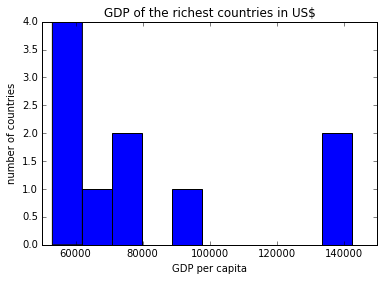

In [24]:
%matplotlib inline
from matplotlib import pyplot
pyplot.hist(richCountriesSorted['2013'])
pyplot.title('GDP of the richest countries in US$')
pyplot.xlabel('GDP per capita')
pyplot.ylabel('number of countries')

years =  ['2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980']
GDPs =  [ 34731.56906569  32425.33910701  31836.65912456  30640.0282309
  30114.32438695  29229.04382102  28866.47408065  27362.47889177
  25469.08366219  24827.57316319  23740.96252966  23094.04534709
  22308.46962188  21316.96727571  20374.17021471  19076.95448416
  18854.42258515  18145.433915    17623.03443525  16776.12774633
  15665.54555255  14695.21139939  14323.21453405  14697.59747363
  14318.50623916  13768.61775569  13198.48032214  12875.62426943
  12330.89567227  11946.66682361  11068.40241521  10506.7662605
   9590.98429094   8526.03811314]


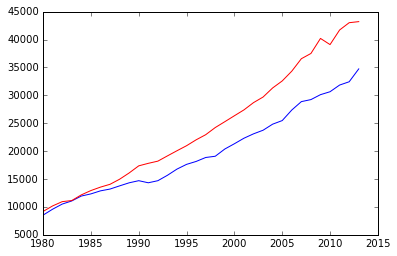

In [37]:
nzGDP = data[ data['Country name'] == 'NEW ZEALAND' ]
ozGDP = data[ data['Country name'] == 'AUSTRALIA' ]
years = []
for c in nzGDP.columns: 
    if c[0] == '2' or c[0] == '1':
        years.append(c)
print('years = ', years)
import numpy
nzgdp = numpy.array(nzGDP[years])[0]
ozgdp = numpy.array(ozGDP[years])[0]
print('GDPs = ', gdp)
pyplot.plot(years, nzgdp, 'b-', years, ozgdp, 'r-')

In [34]:
growthPerCent = 100 * (- gdp[1:] + gdp[:-1])/gdp[1:]
print(growthPerCent)


[ 7.11243127  1.84906331  3.90544971  1.74569363  3.02877019  1.25602365
  5.49656044  7.43409247  2.58386309  4.57694431  2.80122938  3.52142365
  4.65123548]


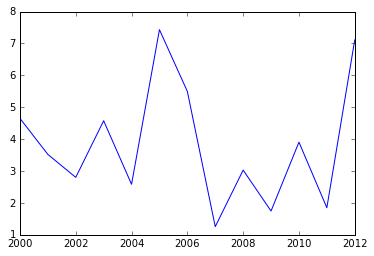

In [35]:
pyplot.plot(years[1:], growthPerCent)